# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

import sys
from data_wrangling import specific_utils, process_monkey_information, specific_utils, process_monkey_information, time_calib_utils, retrieve_raw_data, general_utils, time_calib_class, time_calib_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features, monkey_landing_in_ff
from visualization.matplotlib_tools import plot_behaviors_utils
from planning_analysis.show_planning import nxt_ff_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils


import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from matplotlib import rc
from os.path import exists
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from importlib import reload
import neo
import gc
import rcca
from statsmodels.multivariate.cancorr import CanCorr

import sys
import os
import numpy as np
import torch
from numpy import pi
from matplotlib import pyplot as plt

import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as interpolate
from scipy.signal import fftconvolve


from scipy.io import loadmat
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sys

import scipy.sparse as sparse
import matplotlib.pylab as plt
import subprocess

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0410"
t_inst = time_calib_class.TimeCalibration(raw_data_folder_path=raw_data_folder_path)
t_inst.retrieve_or_make_monkey_data()
t_inst.make_adjusted_ff_caught_times_df()
t_inst.separate_ff_caught_times_df()
t_inst.txt_and_smr.head(7)

Failed to retrieve ff info from txt data. Will get the data anew. Error: [Errno 2] No such file or directory: 'all_monkey_data/raw_monkey_data/monkey_Schro/data_0410/ff_basic_info.npz'
Saved start and end time of juice timestamps at all_monkey_data/time_calibration/monkey_Schro/data_0410/adj_smr_markers_start_and_end_time.csv
Saved ff information to all_monkey_data/raw_monkey_data/monkey_Schro/data_0410/ff_basic_info.npz
Failed to retrieve ff_flash_sorted_ from txt data. Will get the data anew. Error:  [Errno 2] No such file or directory: 'all_monkey_data/raw_monkey_data/monkey_Schro/data_0410/ff_flash_sorted.npz'
Saved ff_flash_sorted to all_monkey_data/raw_monkey_data/monkey_Schro/data_0410/ff_flash_sorted.npz
0 out of 1000 sampled points processed
100 out of 1000 sampled points processed
200 out of 1000 sampled points processed
300 out of 1000 sampled points processed
400 out of 1000 sampled points processed
500 out of 1000 sampled points processed
600 out of 1000 sampled points pro

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/eye_positions.py:115: RuntimeWarning: divide by zero encountered in divide
  numerator_component = 1/np.tan(ver_theta)**2 - np.tan(inside_tan)**2


Saved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


,txt_t,smr_t,diff_txt_smr,diff_txt_smr,diff_txt_smr_2
0,18.12284,18.12284,0.00000,0.00000,0.01339
1,18.78688,18.78184,0.00504,0.00504,0.01842
2,29.47727,29.48278,-0.00550,-0.00550,0.00788
3,32.29915,32.32177,-0.02262,-0.02262,-0.00924
4,34.90538,34.92575,-0.02037,-0.02037,-0.00698
5,39.15486,39.13772,0.01715,0.01715,0.03053
6,48.10220,48.06966,0.03254,0.03254,0.04592


# Calibrate smr markers

In [151]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0410"

In [152]:
channel_signal_output, marker_list, smr_sampling_rate = retrieve_raw_data.extract_smr_data(raw_data_folder_path)
juice_timestamp = marker_list[0]['values'][marker_list[0]['labels'] == 4]
unadj_smr_markers_start_time = marker_list[0]['values'][marker_list[0]['labels']==1][0]
unadj_smr_markers_end_time = juice_timestamp[-1]

In [ ]:
# marker_df = pd.DataFrame({'time': marker_list[0]['values'], 
#                           'label': marker_list[0]['labels']})

In [159]:
# marker_df_sub = marker_df[marker_df['label'].isin([1, 4])].copy()

In [173]:
# smr_t_raw = marker_list[0]['values'][marker_list[0]['labels'] == 4]
# df, _, txt_smr_offset_2 = time_calib_utils.make_txt_and_smr_df(smr_t_raw, t_inst.ff_caught_T_sorted)


In [174]:
txt_smr_offset_2

-0.3193389999998999

In [183]:
ff_caught_T_sorted, ff_index_sorted, ff_real_position_sorted, ff_believed_position_sorted, ff_life_sorted, ff_flash_end_sorted = retrieve_raw_data.make_or_retrieve_ff_info_from_txt_data(raw_data_folder_path)

Failed to retrieve ff info from txt data. Will get the data anew. Error:  [Errno 2] No such file or directory: 'all_monkey_data/raw_monkey_data/monkey_Schro/data_0410/ff_basic_info.npz'


NameError: name 'ff_caught_T_sorted' is not defined

In [ ]:
ff_caught_T_sorted

In [181]:
processed_data_folder_path = raw_data_folder_path.replace('raw_monkey_data', 'processed_data')        
npz_file = os.path.join(os.path.join(processed_data_folder_path, 'ff_basic_info.npz'))
loaded_arrays = np.load(npz_file, allow_pickle = True)
ff_caught_T_sorted = loaded_arrays['ff_caught_T_sorted']

FileNotFoundError: [Errno 2] No such file or directory: 'all_monkey_data/processed_data/monkey_Schro/data_0410/ff_basic_info.npz'

In [ ]:
ff_caught_T_sorted

In [179]:
# smr_t_raw = marker_list[0]['values'][marker_list[0]['labels'] == 4]
# df, _, txt_smr_offset_2 = time_calib_utils.make_txt_and_smr_df(smr_t_raw, t_inst.ff_caught_T_sorted)
# smr_markers_start_time = smr_markers_start_time + txt_smr_offset_2
# smr_markers_end_time = smr_markers_end_time + txt_smr_offset_2

In [180]:
smr_markers_start_time

0.09954900000010009

# smr time calibration  (based on monkey_x and y)

### get new signal_df

In [ ]:
signal_df = process_monkey_information.make_signal_df(raw_data_folder_path)

Retrieved txt_smr_t_calib.csv from all_monkey_data/time_calibration/monkey_Schro/data_0410/txt_smr_t_calib.csv


In [150]:
signal_df.head(4)

,LateralV,LDy,LDz,MonkeyX,MonkeyY,RDy,RDz,AngularV,ForwardV,time,section,time_box
350,-0.02405,-13.58435,2.44556,0.01942,32.22596,-16.57812,1.15387,0.04013,-0.01164,0.33313,0,0
351,-0.01184,-13.51172,2.48615,0.01942,32.68373,-16.61230,1.15387,-0.00412,0.02499,0.33433,0,0
352,0.01257,-13.51172,2.48615,0.01942,32.83632,-16.61658,1.15967,-0.00412,0.00057,0.33553,0,0
353,0.04919,-13.51172,2.48035,0.01942,32.68373,-16.61230,1.15387,0.00473,-0.03605,0.33673,0,0


### test the calib result

In [ ]:
raw_monkey_information = retrieve_raw_data.get_raw_monkey_information_from_txt_data(raw_data_folder_path)
smr_markers_start_time, smr_markers_end_time = time_calib_utils.find_smr_markers_start_and_end_time(raw_data_folder_path)
monkey_information = retrieve_raw_data._trim_monkey_information(raw_monkey_information, smr_markers_start_time, smr_markers_end_time)

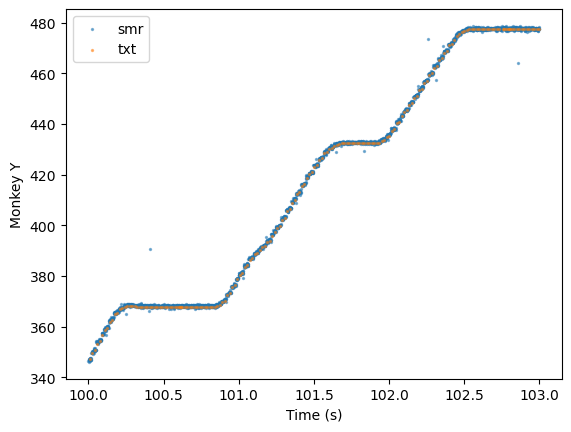

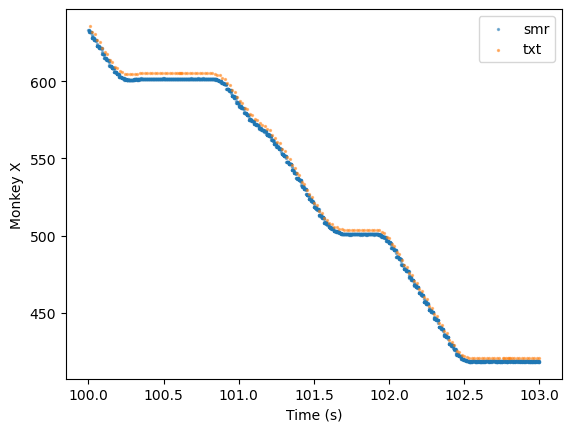

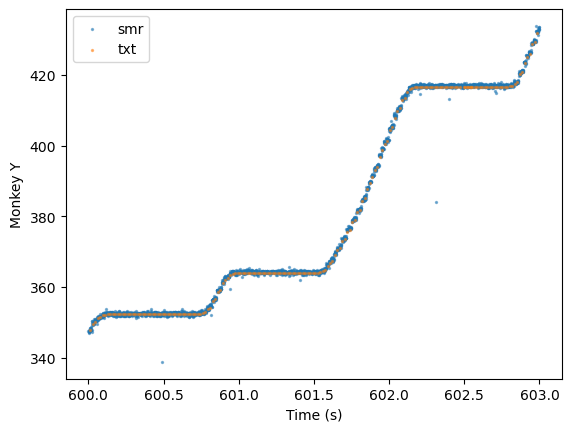

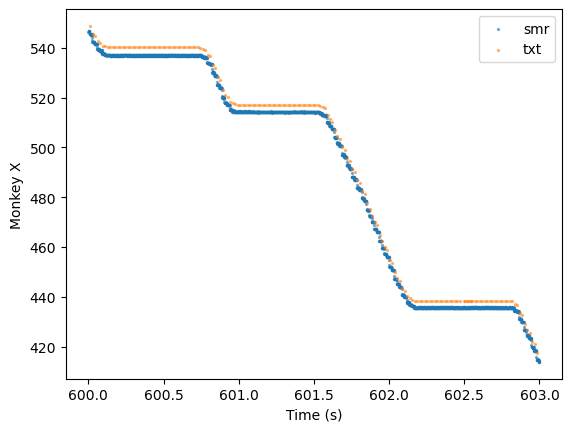

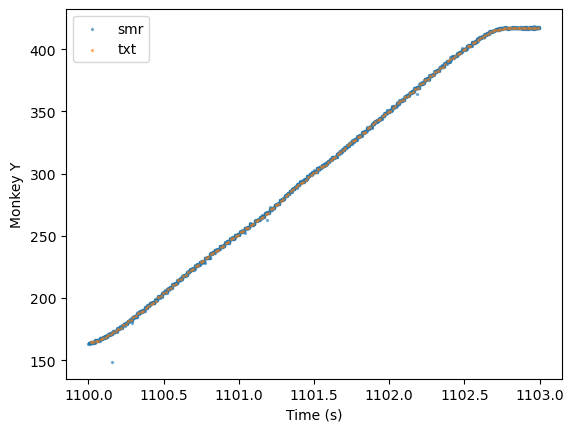

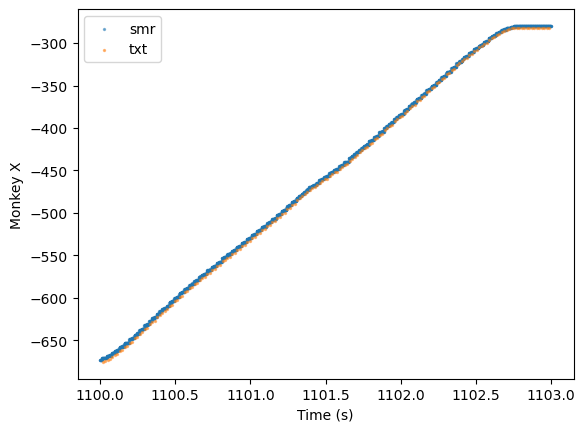

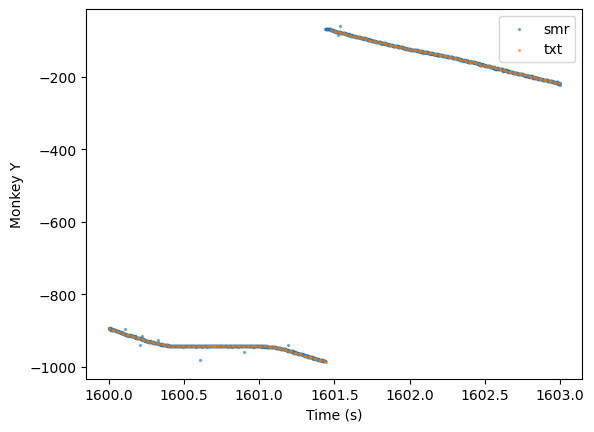

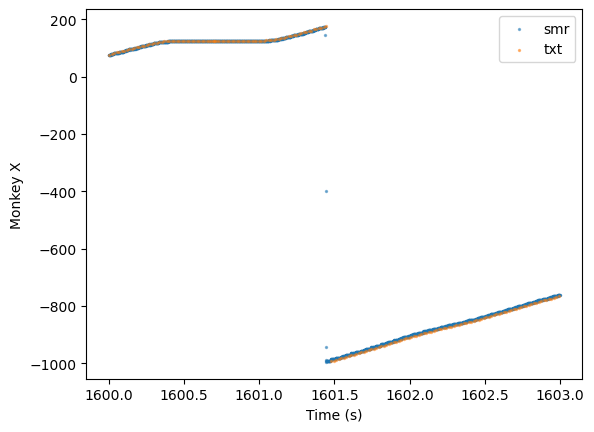

In [ ]:
# Test the result

# duration = [1800, 1801]
for start_time in np.arange(100, 1800, 500):
    duration = [start_time, start_time + 3]
    smr_subset = signal_df.loc[signal_df['time'].between(duration[0], duration[1])]
    txt_subset = monkey_information[(monkey_information['time'] >= duration[0]) & (monkey_information['time'] <= duration[1])]
    # plot monkey x and y
    plt.scatter(smr_subset['time'], smr_subset['MonkeyY'], s=2, alpha=0.5)
    plt.scatter(txt_subset['time'], txt_subset['monkey_y'], s=2, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Monkey Y')
    # plot monkey x and y
    plt.legend(['smr', 'txt'])
    plt.show()

    plt.scatter(smr_subset['time'], smr_subset['MonkeyX'], s=2, alpha=0.5)
    plt.scatter(txt_subset['time'], txt_subset['monkey_x'], s=2, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Monkey X')
    plt.legend(['smr', 'txt'])
    plt.show()


### lin reg of time offset based on ceiling_of_min_distance

In [ ]:
txt_smr_t_diff_via_xy_df = time_calib_utils.make_or_retrieve_txt_smr_t_diff_via_xy_df(raw_data_folder_path)

Retrieved txt_smr_t_diff_via_xy.csv from all_monkey_data/time_calibration/monkey_Schro/data_0410/txt_smr_t_diff_via_xy.csv


Percentage of points taken off because min_distance is greater than 2 cm: 27.00%, 270 out of 1000
Percentage of points taken off because min_distance is greater than 3 cm: 15.30%, 153 out of 1000
Percentage of points taken off because min_distance is greater than 4 cm: 7.70%, 77 out of 1000


,name,slope,intercept,r_value,p_value,std_err,slope x time,sample_size
ceiling_of_min_distance,,,,,,,,
2,Linear Regression,-0.00002,-0.08686,-0.79608,0.00000,0.00000,-0.07344,713
3,Linear Regression,-0.00002,-0.08699,-0.79113,0.00000,0.00000,-0.07298,824
4,Linear Regression,-0.00002,-0.08762,-0.77901,0.00000,0.00000,-0.07273,895


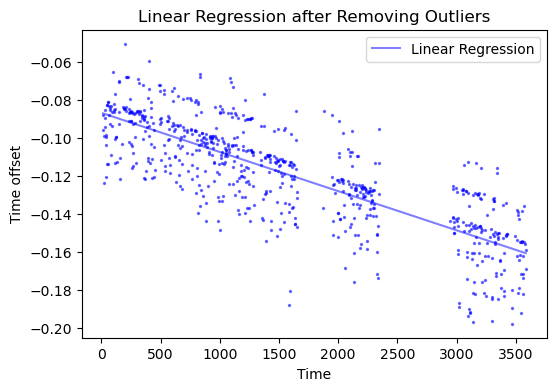

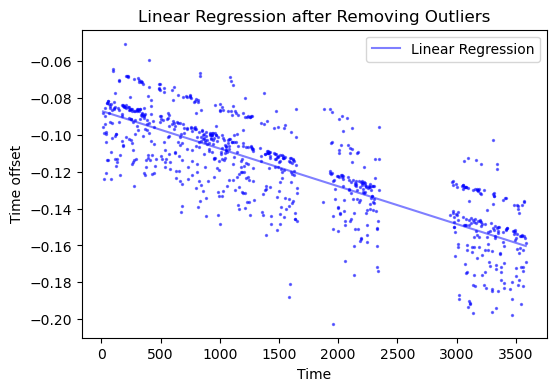

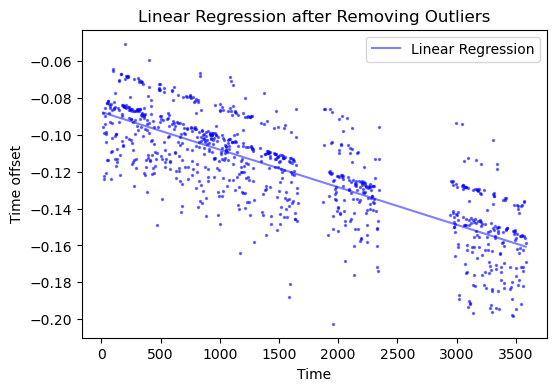

In [ ]:
overall_txt_smr_t_linreg_df = pd.DataFrame()
for ceiling_of_min_distance in range(2, 5):
    fig, ax = plt.subplots(figsize=(6, 4))
    df_sub = time_calib_utils.clean_txt_smr_t_diff_via_xy_df_based_on_min_distance(txt_smr_t_diff_via_xy_df, ceiling_of_min_distance=ceiling_of_min_distance)
    ax, txt_smr_t_linreg_df = time_calib_utils.get_linear_regression(df_sub['time'].values, df_sub['time_offset'].values, ax=ax)
    txt_smr_t_linreg_df['ceiling_of_min_distance'] = ceiling_of_min_distance
    overall_txt_smr_t_linreg_df = pd.concat([overall_txt_smr_t_linreg_df, txt_smr_t_linreg_df])
    #plt.show()
overall_txt_smr_t_linreg_df.set_index('ceiling_of_min_distance', inplace=True)
overall_txt_smr_t_linreg_df

### subplots based on ceiling_of_min_distance

Percentage of points taken off because min_distance is greater than 0.1 cm: 95.20%, 952 out of 1000
Percentage of points taken off because min_distance is greater than 0.5 cm: 72.20%, 722 out of 1000
Percentage of points taken off because min_distance is greater than 1 cm: 49.20%, 492 out of 1000
Percentage of points taken off because min_distance is greater than 2 cm: 27.00%, 270 out of 1000
Percentage of points taken off because min_distance is greater than 3 cm: 15.30%, 153 out of 1000
Percentage of points taken off because min_distance is greater than 5 cm: 1.80%, 18 out of 1000


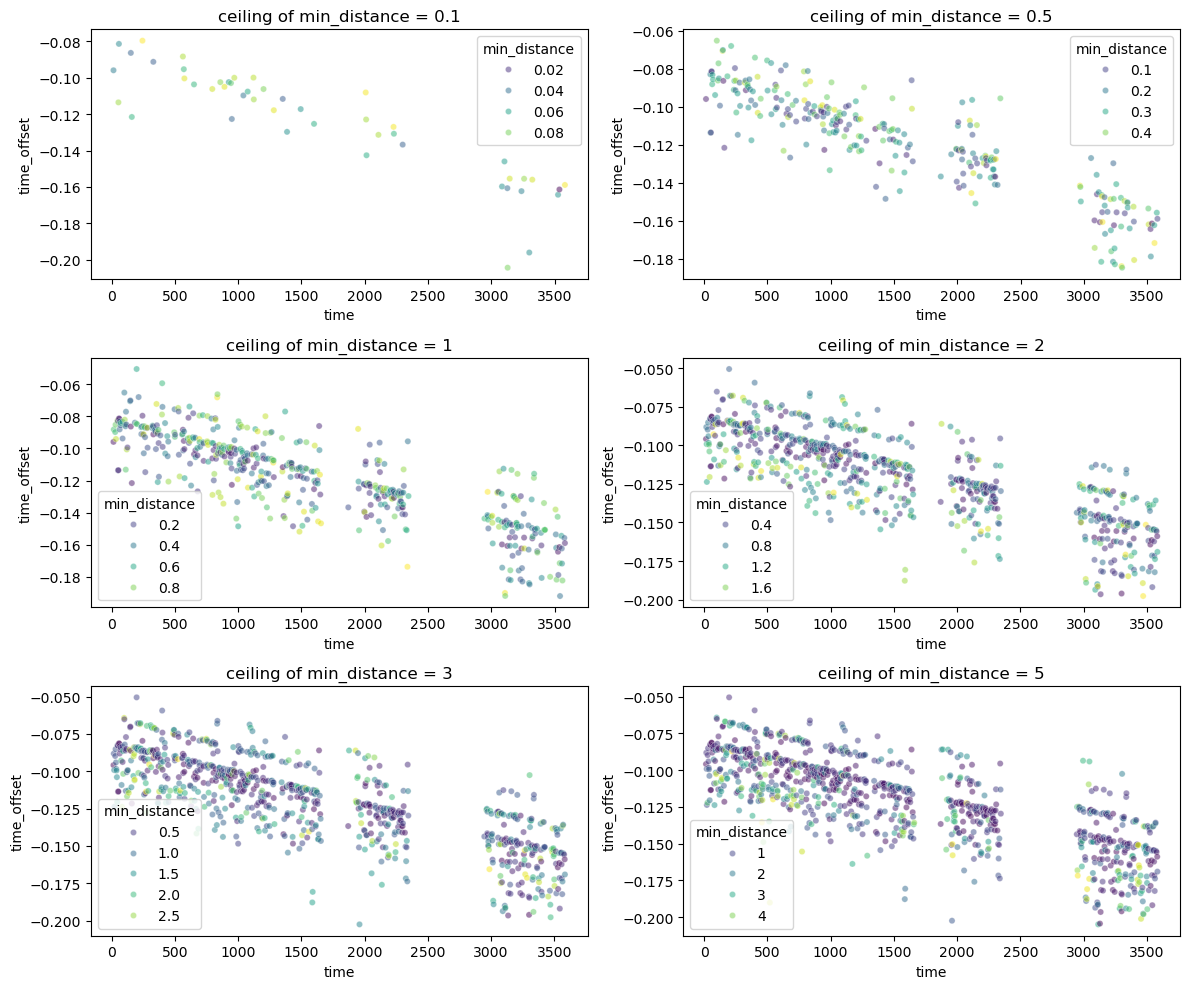

In [ ]:
# Create subplots
ceilings = [0.1, 0.5, 1, 2, 3, 5]
num_rows = math.ceil(len(ceilings) / 2)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# Plot each ceiling in a subplot
for i, ceiling in enumerate(ceilings):
    df_sub0 = time_calib_utils.clean_txt_smr_t_diff_via_xy_df_based_on_min_distance(txt_smr_t_diff_via_xy_df, ceiling_of_min_distance=ceiling)
    df_sub = df_sub0.iloc[np.where(time_calib_utils.find_non_outliers_based_on_IQR(df_sub0['time_offset']))[0]].copy()
    sns.scatterplot(data=df_sub, x='time', y='time_offset', hue='min_distance', s=20, alpha=0.5, palette='viridis', ax=axes[i])
    axes[i].set_title(f'ceiling of min_distance = {ceiling}')

# Adjust layout
plt.tight_layout()
plt.show()

# Compare monkey_speed and speeddummy between txt and smr

In [10]:
monkey_information = t_inst.monkey_information.copy()
monkey_information['monkey_speeddummy'] = ((monkey_information['monkey_speed'] > 0.1) | \
                                        (np.abs(monkey_information['monkey_dw']) > 0.0035)).astype(int)
monkey_information['monkey_speeddummy_smr'] = ((monkey_information['monkey_speed_smr'] > 0.1) | \
                                        (np.abs(monkey_information['monkey_dw_smr']) > 0.0035)).astype(int)
diff_df = monkey_information[['point_index', 'time']].copy()
diff_df['monkey_x'] = monkey_information['monkey_x'] - monkey_information['monkey_x_smr']
diff_df['monkey_y'] = monkey_information['monkey_y'] - monkey_information['monkey_y_smr']
diff_df['monkey_speed'] = monkey_information['monkey_speed'] - monkey_information['monkey_speed_smr']
diff_df['monkey_dw'] = monkey_information['monkey_dw'] - monkey_information['monkey_dw_smr']
diff_df['monkey_speeddummy'] = monkey_information['monkey_speeddummy'] - monkey_information['monkey_speeddummy_smr']

## get statistics

### overall

In [ ]:
diff_df.describe()

,point_index,time,monkey_x,monkey_y,monkey_speed,monkey_dw,monkey_speeddummy
count,217026.00000,217026.00000,217017.00000,217017.00000,217017.00000,217017.00000,217026.00000
mean,108542.50000,1792.53387,-0.33669,-0.27259,-8.95452,-0.00146,0.03159
std,62650.15410,1035.63820,28.27587,28.46681,38.28536,0.76289,0.18414
min,30.00000,0.42753,-1967.97772,-1991.04962,-143.72836,-188.06516,-1.00000
25%,54286.25000,895.39446,-2.12186,-0.29956,-0.21009,-0.00031,0.00000
50%,108542.50000,1791.67275,-0.96648,-0.11673,-0.01774,-0.00001,0.00000
75%,162798.75000,2689.42838,1.45480,0.04126,-0.00068,0.00038,0.00000
max,217055.00000,3587.10102,1932.25122,2000.34943,184.13029,98.49108,1.00000


In [ ]:
# get every 5 percentile for columns in diff_df, and put them into the same df
percentiles = np.arange(0, 100, 1)
percentiles_df = pd.DataFrame({'percentile': percentiles})
for col in diff_df.columns:
    # get the non-NA values in diff_df[col]
    non_na_values = diff_df[col].dropna()
    percentiles_df[col] = np.percentile(non_na_values, percentiles)

In [ ]:
percentiles_df.head(10)

,percentile,point_index,time,monkey_x,monkey_y,monkey_speed,monkey_dw,monkey_speeddummy
0,0,30.00000,0.42753,-1967.97772,-1991.04962,-143.72836,-188.06516,-1.00000
1,1,2200.25000,36.30390,-5.87228,-0.71667,-99.48958,-0.39509,0.00000
2,2,4370.50000,72.11388,-5.66943,-0.64038,-97.61109,-0.30504,0.00000
3,3,6540.75000,107.82417,-5.35988,-0.59976,-96.11803,-0.26352,0.00000
4,4,8711.00000,143.70051,-5.11365,-0.56409,-94.59387,-0.23213,0.00000
5,5,10881.25000,179.47732,-4.92592,-0.56335,-93.11590,-0.20619,0.00000
6,6,13051.50000,215.23753,-4.77106,-0.53192,-91.39533,-0.18436,0.00000
7,7,15221.75000,251.14712,-4.56390,-0.50250,-89.35843,-0.16600,0.00000
8,8,17392.00000,286.97362,-4.40387,-0.48779,-86.62605,-0.14764,0.00000
9,9,19562.25000,322.73385,-4.25147,-0.46991,-83.64744,-0.13220,0.00000


In [ ]:
percentiles_df.tail(10)

,percentile,point_index,time,monkey_x,monkey_y,monkey_speed,monkey_dw,monkey_speeddummy
90,90,195352.50000,3228.52002,3.81195,0.19194,33.31242,0.11700,0.00000
91,91,197522.75000,3264.41289,3.93855,0.19299,36.98560,0.13150,0.00000
92,92,199693.00000,3300.23958,4.12629,0.21307,41.20670,0.14673,0.00000
93,93,201863.25000,3336.14905,4.34070,0.23590,44.40861,0.16477,0.00000
94,94,204033.50000,3372.05863,4.50934,0.25717,47.55803,0.18489,0.00000
95,95,206203.75000,3407.91838,4.63855,0.26892,47.58244,0.20796,0.00000
96,96,208374.00000,3443.81136,4.80852,0.26892,47.59465,0.23718,0.00000
97,97,210544.25000,3479.68777,5.04016,0.31223,48.14824,0.27069,1.00000
98,98,212714.50000,3515.55191,5.40652,0.34793,54.38289,0.31418,1.00000
99,99,214884.75000,3551.35748,5.58856,0.42151,60.30217,0.40173,1.00000


### monkey_speeddummy

In [ ]:
monkey_information['monkey_speeddummy'].mean()

0.534332291983449

In [ ]:
diff_df['monkey_speeddummy'].mean()

0.031586077244201156

In [ ]:
diff_df['monkey_speeddummy'].abs().mean()

0.03490365209698377

## see specific points

### based on monkey_speeddummy

In [11]:
diff_df[diff_df['monkey_speeddummy'] != 0].iloc[1000:]

,point_index,time,monkey_x,monkey_y,monkey_speed,monkey_dw,monkey_speeddummy
22955,22955,378.80390,3.83777,0.05496,-0.02662,0.11496,1
22956,22956,378.82054,3.83777,-0.09763,-0.00068,0.02150,1
22957,22957,378.83713,3.83777,-0.02133,-0.00554,0.01417,1
23025,23025,379.93271,3.87518,-0.04254,-0.02496,0.04231,1
23026,23026,379.94927,3.72260,0.03375,-0.02523,0.02596,1
...,...,...,...,...,...,...,...
216968,216968,3585.69010,-2.20007,-0.27432,-0.00068,0.15384,1
216969,216969,3585.70665,-2.20007,0.18344,-0.02229,0.13747,1
216970,216970,3585.72322,-2.20007,0.18344,-0.02139,0.45640,1
217015,217015,3586.47017,-2.47772,-0.28659,14.96313,-0.00008,1


In [12]:
columns = ['point_index', 'time', 'monkey_speeddummy', 'monkey_speeddummy_smr', 'monkey_speed', 'monkey_speed_smr', 'monkey_dw', 'monkey_dw_smr', 'monkey_x', 'monkey_x_smr', 'monkey_y', 'monkey_y_smr']

In [13]:
point_index = 20641
m_sub = monkey_information.loc[point_index-5: point_index+5, columns].copy()
m_sub['whether_the_points'] = np.where(m_sub['point_index'] == point_index, 'yesssss', 'no')
m_sub.set_index('whether_the_points', inplace=True)
m_sub

,point_index,time,monkey_speeddummy,monkey_speeddummy_smr,monkey_speed,monkey_speed_smr,monkey_dw,monkey_dw_smr,monkey_x,monkey_x_smr,monkey_y,monkey_y_smr
whether_the_points,,,,,,,,,,,,
no,20636,340.44182,1,1,200.00000,190.52791,0.15094,0.20969,-424.05093,-421.42834,-827.48975,-827.37793
no,20637,340.45824,1,1,92.55422,190.52791,0.36767,0.20992,-423.24167,-420.51282,-828.77588,-828.75122
no,20638,340.47491,1,1,200.00000,190.54012,0.19886,0.24691,-420.67221,-417.84253,-832.80341,-832.79480
no,20639,340.49149,1,1,190.57921,190.52791,0.51942,0.27101,-418.96045,-416.24036,-835.45984,-835.61768
no,20640,340.50801,1,1,94.35036,190.52791,0.17795,0.27163,-418.11328,-415.32483,-836.76807,-836.76208
yesssss,20641,340.52472,1,1,200.00000,190.54012,0.27693,0.34539,-415.49020,-412.57825,-840.74231,-841.03455
no,20642,340.54133,1,1,190.47403,190.56453,0.65400,0.38246,-413.73086,-410.97607,-843.37225,-843.24707
no,20643,340.55784,1,1,94.44113,190.55232,0.21646,0.38246,-412.86008,-409.98425,-844.66498,-844.84924
no,20644,340.57454,1,1,200.00000,190.54012,0.23027,0.39443,-410.16052,-407.39026,-848.58765,-848.51135


### based on monkey_speed

In [14]:
diff_df[diff_df['monkey_speed'] > 10].iloc[100:]

,point_index,time,monkey_x,monkey_y,monkey_speed,monkey_dw,monkey_speeddummy
1252,1252,20.64608,-2.51279,-0.05762,11.08952,0.00167,0
1256,1256,20.71249,-2.63840,-0.10614,18.95695,0.22641,0
1258,1258,20.74566,-2.65649,0.03140,20.56218,0.24134,0
1260,1260,20.77886,-2.82687,0.12628,22.16130,0.24535,0
1262,1262,20.81211,-2.80029,0.00940,20.58659,0.24764,0
...,...,...,...,...,...,...,...
217007,217007,3586.33746,-2.58707,0.00967,47.58244,-0.15874,0
217009,217009,3586.37063,-2.50330,-0.11395,47.58244,0.02864,0
217011,217011,3586.40378,-2.67477,-0.28024,74.40773,0.10768,0
217013,217013,3586.43697,-2.57260,0.18173,33.84124,0.00071,0


In [15]:
columns = ['point_index', 'time', 'monkey_x', 'monkey_x_smr', 'monkey_y', 'monkey_y_smr', 'monkey_speed', 'monkey_speed_smr', 'monkey_dw', 'monkey_dw_smr', 'monkey_speeddummy', 'monkey_speeddummy_smr']

In [16]:
point_index = 2370
m_sub = monkey_information.loc[point_index-5: point_index+5, columns].copy()
m_sub['whether_the_points'] = np.where(m_sub['point_index'] == point_index, 'yesssss', 'no')
m_sub.set_index('whether_the_points', inplace=True)
m_sub

,point_index,time,monkey_x,monkey_x_smr,monkey_y,monkey_y_smr,monkey_speed,monkey_speed_smr,monkey_dw,monkey_dw_smr,monkey_speeddummy,monkey_speeddummy_smr
whether_the_points,,,,,,,,,,,,
no,2365,39.03867,341.99365,340.13782,-305.45581,-305.37476,180.76731,168.31111,0.32824,0.28360,1,1
no,2366,39.05519,342.76975,340.74817,-306.64975,-306.51917,86.22016,168.28670,0.08872,0.28337,1,1
no,2367,39.07187,344.83011,342.80811,-309.80466,-309.57092,200.00000,100.03719,0.03518,0.00001,1,1
no,2368,39.08836,345.28052,343.18958,-310.49432,-310.25757,49.94340,100.02499,-0.00000,-0.00015,1,1
no,2369,39.10510,346.08173,344.10510,-311.72116,-311.55457,87.56341,58.77743,0.00013,0.00008,1,1
yesssss,2370,39.12168,346.33231,344.41028,-312.10486,-312.16492,27.64175,58.75301,0.00000,0.00008,1,1
no,2371,39.13825,346.53055,344.41028,-312.40842,-312.39380,21.86848,0.01660,0.00000,-0.00007,1,0
no,2372,39.15486,346.53055,344.41028,-312.40839,-312.47009,0.00187,0.00068,0.00000,-0.00007,0,0
no,2373,39.17168,346.53055,344.41028,-312.40839,-312.47009,0.00000,0.01185,0.00000,-0.00007,0,0


# Compare scatter within ff reward boundary

In [100]:
valid_subset = pd.DataFrame({'cur_ff_index': np.arange(len(t_inst.ff_caught_T_sorted)),
                             'time': t_inst.ff_caught_T_sorted})
                             

## txt

no data where monkey is inside reward boundary for ff_index 27 at time around 122.635508
no data where monkey is inside reward boundary for ff_index 59 at time around 247.515826


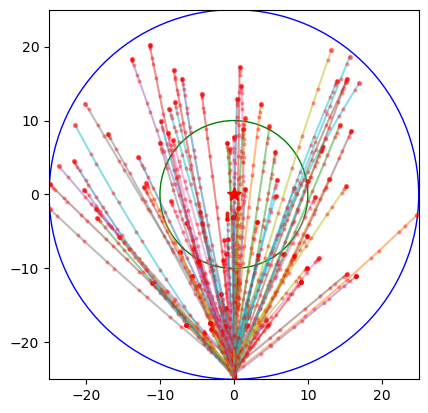

In [101]:
monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset, t_inst.monkey_information, t_inst.ff_real_position_sorted)


## smr

In [106]:
temp_monkey_information = t_inst.monkey_information.copy()
temp_monkey_information['monkey_x'] = temp_monkey_information['monkey_x_smr']
temp_monkey_information['monkey_y'] = temp_monkey_information['monkey_y_smr']

no data where monkey is inside reward boundary for ff_index 27 at time around 122.635508
no data where monkey is inside reward boundary for ff_index 59 at time around 247.515826


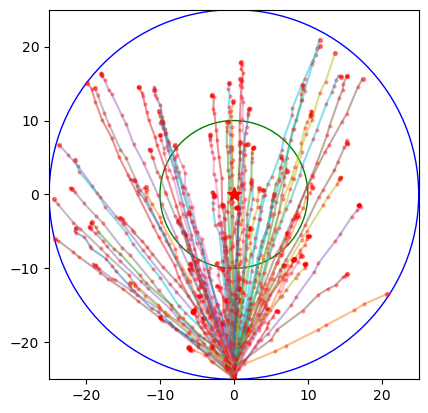

In [108]:
monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset, temp_monkey_information, t_inst.ff_real_position_sorted)

# Compare closest_stop_to_capture

## stop based on both

monkey_speeddummy is based on both smr and txt (if one of them identifies a point as stop, then it is a stop)

In [69]:
temp_monkey_information = t_inst.monkey_information.copy()

In [70]:
closest_stop_to_capture_df = nxt_ff_utils.get_closest_stop_time_to_all_capture_time(t_inst.ff_caught_T_sorted, temp_monkey_information, t_inst.ff_real_position_sorted, 
                                                                                        cur_ff_index_array=np.arange(len(t_inst.ff_caught_T_sorted)))
closest_stop_to_capture_df.head(3)

,time,point_index,caught_time,diff_from_caught_time,cur_ff_index,stop_point_index,stop_time,distance_from_ff_to_stop,whether_stop_inside_boundary
1096,18.12284,1096,18.12284,-0.00000,0,1096,18.12284,14.50757,True
1138,18.78688,1138,18.78688,-0.00000,1,1138,18.78688,4.84381,True
1783,29.47727,1783,29.47727,-0.00000,2,1783,29.47727,8.04846,True


In [71]:
closest_stop_to_capture_df['diff_from_caught_time'].describe()

count   605.00000
mean     -0.00000
std       0.00000
min      -0.00001
25%      -0.00000
50%      -0.00000
75%      -0.00000
max      -0.00000
Name: diff_from_caught_time, dtype: float64

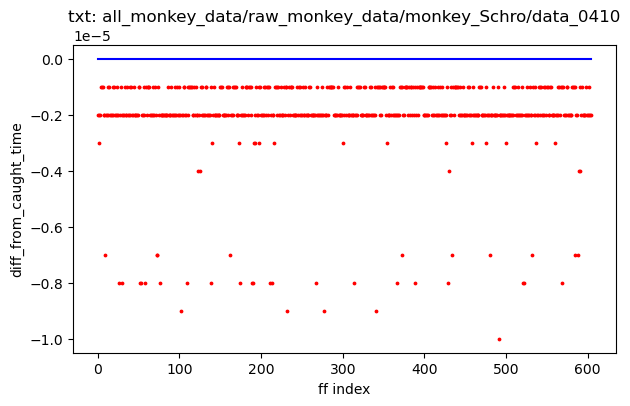

In [72]:
# Notice the unit of y axis

plt.figure(figsize=(7, 4))
num_points = closest_stop_to_capture_df.shape[0]
plt.scatter(range(num_points), closest_stop_to_capture_df['diff_from_caught_time'], s=3, color='red')
plt.plot(range(num_points), np.zeros(num_points), color='blue')
plt.title(f'txt: {raw_data_folder_path}')
plt.xlabel('ff index')
plt.ylabel('diff_from_caught_time')
plt.show()

## stop based on txt alone

In [52]:
temp_monkey_information = t_inst.monkey_information.copy()
temp_monkey_information['monkey_speeddummy'] = ((temp_monkey_information['monkey_speed_smr'] > 0.1) | \
                                        (np.abs(temp_monkey_information['monkey_dw_smr']) > 0.0035)).astype(int)

In [53]:
closest_stop_to_capture_df = nxt_ff_utils.get_closest_stop_time_to_all_capture_time(t_inst.ff_caught_T_sorted, temp_monkey_information, t_inst.ff_real_position_sorted, 
                                                                                        cur_ff_index_array=np.arange(len(t_inst.ff_caught_T_sorted)))
closest_stop_to_capture_df.head(3)

,time,point_index,caught_time,diff_from_caught_time,cur_ff_index,stop_point_index,stop_time,distance_from_ff_to_stop,whether_stop_inside_boundary
1096,18.12284,1096,18.12284,-0.00000,0,1096,18.12284,14.50757,True
1138,18.78688,1138,18.78688,-0.00000,1,1138,18.78688,4.84381,True
1783,29.47727,1783,29.47727,-0.00000,2,1783,29.47727,8.04846,True


In [67]:
closest_stop_to_capture_df['diff_from_caught_time'].describe()

count   605.00000
mean     -0.00003
std       0.00068
min      -0.01662
25%      -0.00000
50%      -0.00000
75%      -0.00000
max      -0.00000
Name: diff_from_caught_time, dtype: float64

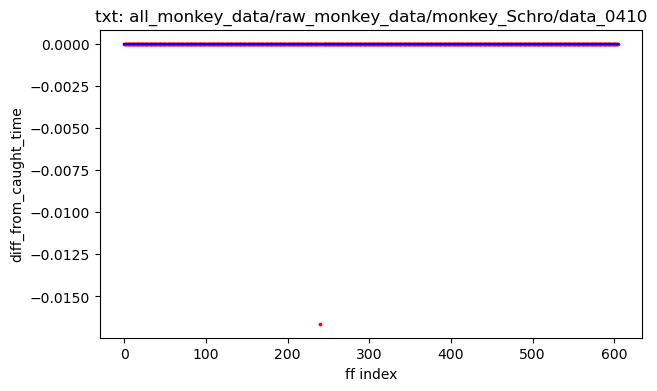

In [54]:
# Notice the unit of y axis

plt.figure(figsize=(7, 4))
num_points = closest_stop_to_capture_df.shape[0]
plt.scatter(range(num_points), closest_stop_to_capture_df['diff_from_caught_time'], s=3, color='red')
plt.plot(range(num_points), np.zeros(num_points), color='blue')
plt.title(f'txt: {raw_data_folder_path}')
plt.xlabel('ff index')
plt.ylabel('diff_from_caught_time')
plt.show()

## stop based on smr alone

In [60]:
temp_monkey_information = t_inst.monkey_information.copy()
temp_monkey_information['monkey_speeddummy'] = ((temp_monkey_information['monkey_speed_smr'] > 0.1) | \
                                        (np.abs(temp_monkey_information['monkey_dw_smr']) > 0.0035)).astype(int)

In [73]:
closest_stop_to_capture_df2 = nxt_ff_utils.get_closest_stop_time_to_all_capture_time(t_inst.ff_caught_T_sorted, temp_monkey_information, t_inst.ff_real_position_sorted, 
                                                                                        cur_ff_index_array=np.arange(len(t_inst.ff_caught_T_sorted)))
closest_stop_to_capture_df2.head(3)

,time,point_index,caught_time,diff_from_caught_time,cur_ff_index,stop_point_index,stop_time,distance_from_ff_to_stop,whether_stop_inside_boundary
1096,18.12284,1096,18.12284,-0.00000,0,1096,18.12284,14.50757,True
1138,18.78688,1138,18.78688,-0.00000,1,1138,18.78688,4.84381,True
1783,29.47727,1783,29.47727,-0.00000,2,1783,29.47727,8.04846,True


In [68]:
closest_stop_to_capture_df2['diff_from_caught_time'].describe()

count   551.00000
mean      0.00673
std       0.01490
min      -0.03895
25%      -0.00274
50%       0.00294
75%       0.00797
max       0.06327
Name: diff_from_caught_time, dtype: float64

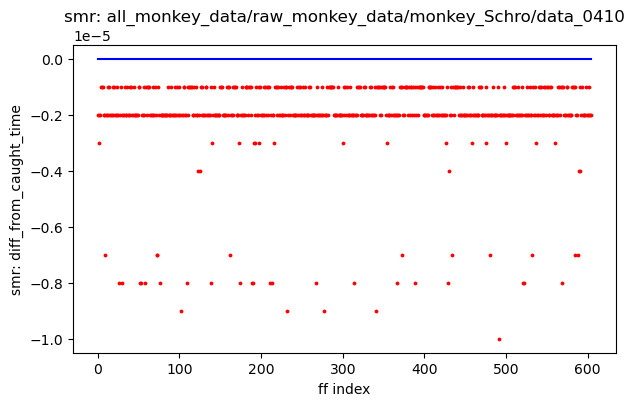

In [74]:
plt.figure(figsize=(7, 4))
num_points = closest_stop_to_capture_df2.shape[0]
plt.scatter(range(num_points), closest_stop_to_capture_df2['diff_from_caught_time'], s=3, color='red')
plt.plot(range(num_points), np.zeros(num_points), color='blue')
plt.title(f'smr: {raw_data_folder_path}')
plt.xlabel('ff index')
plt.ylabel('smr: diff_from_caught_time')
plt.show()

## all info based on smr

In [ ]:
raw_signal_df = process_monkey_information.get_raw_signal_df(raw_data_folder_path)
monkey_information = retrieve_raw_data.get_trimmed_monkey_information(raw_data_folder_path)
monkey_information = process_monkey_information._add_smr_file_info_to_monkey_information(monkey_information, raw_signal_df)
monkey_information.rename(columns={'MonkeyX': 'monkey_x_smr', 'MonkeyY': 'monkey_y_smr', 'AngularV': 'monkey_dw_smr'}, inplace=True)
monkey_information = process_monkey_information.get_monkey_speed_and_dw_from_smr_info(monkey_information)


In [84]:
temp_monkey_information = monkey_information.copy()
temp_monkey_information['monkey_speeddummy'] = ((temp_monkey_information['monkey_speed_smr'] > 0.1) | \
                                        (np.abs(temp_monkey_information['monkey_dw_smr']) > 0.0035)).astype(int)

In [86]:
closest_stop_to_capture_df2 = nxt_ff_utils.get_closest_stop_time_to_all_capture_time(t_inst.ff_caught_times_df['smr_t_raw'], temp_monkey_information, t_inst.ff_real_position_sorted, 
                                                                                        cur_ff_index_array=np.arange(len(t_inst.ff_caught_times_df)))
closest_stop_to_capture_df2.head(3)

,time,point_index,caught_time,diff_from_caught_time,cur_ff_index,stop_point_index,stop_time,distance_from_ff_to_stop,whether_stop_inside_boundary
1079,18.33860,1109,18.42879,-0.09020,0,1109,18.80350,47.94568,False
1128,19.08566,1158,19.08780,-0.00214,1,1158,19.58365,12.63368,True
1772,29.78692,1802,29.78873,-0.00180,2,1802,30.25742,9.25666,True


In [87]:
closest_stop_to_capture_df2['diff_from_caught_time'].describe()

count   551.00000
mean     -0.00292
std       0.01972
min      -0.22878
25%      -0.00430
50%      -0.00043
75%       0.00406
max       0.00828
Name: diff_from_caught_time, dtype: float64

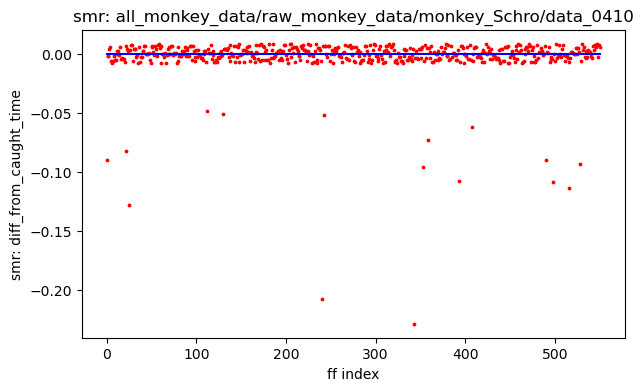

In [88]:
plt.figure(figsize=(7, 4))
num_points = closest_stop_to_capture_df2.shape[0]
plt.scatter(range(num_points), closest_stop_to_capture_df2['diff_from_caught_time'], s=3, color='red')
plt.plot(range(num_points), np.zeros(num_points), color='blue')
plt.title(f'smr: {raw_data_folder_path}')
plt.xlabel('ff index')
plt.ylabel('smr: diff_from_caught_time')
plt.show()

# Compare smr mean vs median

In [89]:
signal_df = process_monkey_information.make_signal_df(raw_data_folder_path)
monkey_information = t_inst.monkey_information.copy()
time_bins = general_utils.find_time_bins_for_an_array(monkey_information['time'].values)

# add time_box to monkey_information
monkey_information.loc[:, 'time_box'] = np.arange(1, len(monkey_information)+1)
signal_df.loc[:, 'time_box'] = np.digitize(signal_df['time'].values, time_bins)

# use groupby and then find average for LDy, LDz, RDy, RDz
condensed_signal_df = signal_df[['time_box', 'LDy', 'LDz', 'RDy', 'RDz', 'MonkeyX', 'MonkeyY', 'LateralV', 'ForwardV', 'AngularV']]
condensed_signal_df['radius'] = np.sqrt(condensed_signal_df['MonkeyX']**2 + condensed_signal_df['MonkeyY']**2)
mean_df = condensed_signal_df.groupby('time_box').mean().reset_index(drop=False)
median_df = condensed_signal_df.groupby('time_box').median().reset_index(drop=False)
mean_df.index = mean_df.time_box.values
median_df.index = median_df.time_box.values
diff_df = (mean_df - median_df)

Retrieved txt_smr_t_calib.csv from all_monkey_data/time_calibration/monkey_Schro/data_0410/txt_smr_t_calib.csv


/var/folders/81/249hbjx960s5t_1dxgdxz6r00000gn/T/ipykernel_34846/1423387171.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_signal_df['radius'] = np.sqrt(condensed_signal_df['MonkeyX']**2 + condensed_signal_df['MonkeyY']**2)


In [90]:
condensed_signal_df.groupby('time_box').count().reset_index(drop=False)

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
0,0,72,72,72,72,72,72,72,72,72,72
1,1,14,14,14,14,14,14,14,14,14,14
2,2,14,14,14,14,14,14,14,14,14,14
3,3,14,14,14,14,14,14,14,14,14,14
4,4,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...
217013,217013,10,10,10,10,10,10,10,10,10,10
217014,217014,6,6,6,6,6,6,6,6,6,6
217015,217015,7,7,7,7,7,7,7,7,7,7
217016,217016,7,7,7,7,7,7,7,7,7,7


## get statistics

In [91]:
diff_df.describe()

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
count,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000,217018.00000
mean,0.00000,0.00435,0.02042,0.00313,-0.00194,-0.00786,-0.01633,-0.00091,-0.00072,-0.00039,-0.00669
std,0.00000,2.33273,3.27217,1.82181,2.51516,3.98510,1.72775,0.01773,2.33571,0.55259,0.85083
min,0.00000,-98.85752,-105.86832,-60.81547,-84.33105,-376.02743,-178.30258,-0.40741,-35.70208,-11.83574,-91.37935
25%,0.00000,-0.01150,-0.01698,-0.01129,-0.00953,-0.06539,-0.05869,-0.00436,-0.00610,-0.00443,-0.05357
50%,0.00000,0.00153,-0.00207,0.00122,-0.00249,-0.01090,0.00000,0.00000,0.00000,0.00000,0.00010
75%,0.00000,0.00887,0.02186,0.00793,0.01160,0.04360,0.05869,0.00376,0.00523,0.00379,0.05413
max,0.00000,95.11813,105.40554,61.01962,98.06981,347.80593,227.06168,0.36011,41.37311,14.92948,33.56963


## see specific points

In [96]:
diff_df[diff_df['AngularV'] > 10]

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
962,0,0.01923,11.39954,-0.01282,-0.12798,0.06539,0.16349,-0.00174,12.45814,14.92948,-0.20940
178818,0,0.03664,0.09255,0.09827,-0.04148,-0.13498,-3.13392,-0.01221,7.91485,12.23288,0.49587


In [93]:
window = 5 

In [97]:
box = 178818
median_df[median_df['time_box'].between(box-window, box+window)]

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
178813,178813,0.50409,2.28320,-2.88062,-5.10834,-919.93298,-90.75987,-0.03015,169.84920,38.08670,924.42935
178814,178814,0.14948,1.44534,-3.30359,-5.52002,-920.23816,-94.80345,0.00647,168.28670,33.19259,925.13212
178815,178815,-0.37817,2.40207,-4.05341,-4.83002,-920.69592,-96.48192,-0.01184,168.26228,33.16162,925.68984
178816,178816,-1.52319,1.92371,-4.97839,-5.86792,-921.00110,-100.52550,0.00037,161.92683,29.66141,926.47094
178817,178817,-2.18329,-1.61328,-5.49963,-6.32889,-921.00110,-100.52550,-0.01794,161.95125,29.66141,926.52072
178818,178818,-2.95447,-6.05771,-6.60406,-6.93192,-921.30627,-101.51732,-0.01184,142.90828,0.01358,926.88242
178819,178819,-3.30908,-6.34473,-6.90527,-6.99280,-922.22180,-112.12218,0.03699,120.66708,-8.32321,929.01757
178820,178820,-3.50348,-6.35342,-7.10394,-7.29431,-922.37439,-112.57994,0.00037,115.90023,-8.36746,929.21020
178821,178821,-3.59106,-6.25195,-7.39661,-7.19574,-922.37439,-113.80064,0.00037,115.90633,-13.20847,929.33080
178822,178822,-3.72351,-6.28094,-7.59741,-7.46826,-922.37439,-114.10582,0.01257,103.19881,-16.67771,929.38682


In [98]:
mean_df[mean_df['time_box'].between(box-window, box+window)]

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
178813,178813,0.61517,2.35485,-2.78693,-5.04207,-919.95478,-90.70538,-0.03538,169.41846,37.49943,924.41574
178814,178814,0.13666,1.34470,-3.27338,-5.44878,-920.23816,-94.87975,0.00560,168.29280,33.59401,925.11755
178815,178815,-0.36749,2.59631,-3.90204,-4.81097,-920.60873,-96.29663,-0.00574,167.15057,32.66412,925.63153
178816,178816,-1.22872,1.24129,-4.61753,-5.77292,-921.01284,-100.06773,-0.00902,162.41230,29.98546,926.43379
178817,178817,-2.17460,-0.85273,-5.53737,-6.41664,-921.06722,-100.56110,-0.00370,161.94311,29.65846,926.54059
178818,178818,-2.91782,-5.96516,-6.50580,-6.97340,-921.44126,-104.65124,-0.02405,150.82313,12.24646,927.37829
178819,178819,-3.33472,-6.34555,-6.93091,-7.04084,-922.28720,-111.88240,0.02652,119.33128,-8.32827,929.04879
178820,178820,-3.50633,-6.35729,-7.11605,-7.29431,-922.34896,-112.83425,-0.01794,115.90023,-9.16987,929.22516
178821,178821,-3.59106,-6.25609,-7.40027,-7.20651,-922.30899,-114.01863,-0.00835,115.90285,-13.20467,929.33005
178822,178822,-3.78617,-6.37823,-7.59029,-7.46117,-922.30657,-114.30927,0.01257,107.42652,-15.52719,929.36341


In [99]:
condensed_signal_df[condensed_signal_df['time_box'].between(box-1, box+1)]

,time_box,LDy,LDz,RDy,RDz,MonkeyX,MonkeyY,LateralV,ForwardV,AngularV,radius
2463305,178817,-1.56165,1.45404,-5.29028,-6.14044,-921.00110,-100.83067,-0.02405,161.98787,29.65256,926.50410
2463306,178817,-1.56592,1.43665,-5.29883,-6.14624,-921.15369,-100.67809,-0.01184,161.96346,29.59945,926.63919
2463307,178817,-1.55737,1.43665,-5.29456,-6.14624,-921.00110,-100.83067,0.01257,161.93904,29.64371,926.50410
2463308,178817,-1.56165,1.43085,-5.29883,-6.15204,-920.69592,-100.52550,0.02478,161.96346,29.67911,926.16756
2463309,178817,-1.55737,1.42505,-5.29883,-6.15204,-921.15369,-100.67809,-0.02405,161.95125,29.66141,926.63919
2463310,178817,-1.57446,1.39606,-5.29456,-6.16364,-921.00110,-100.98326,-0.03625,161.96346,29.64371,926.52072
2463311,178817,-1.80518,1.07715,-5.28174,-6.22742,-921.00110,-100.83067,-0.02405,161.93904,29.67026,926.50410
2463312,178817,-1.96753,0.86261,-5.29456,-6.25061,-921.15369,-100.22032,0.00037,161.95125,29.65256,926.58957
2463313,178817,-1.96753,0.84521,-5.28601,-6.25641,-921.00110,-100.98326,0.04919,161.92683,29.68796,926.52072
2463314,178817,-1.95471,0.82202,-5.26038,-6.27380,-921.00110,-99.91515,-0.01184,161.91463,29.67911,926.40491


# Compare capture time between data

## compare capture time

### txt vs smr

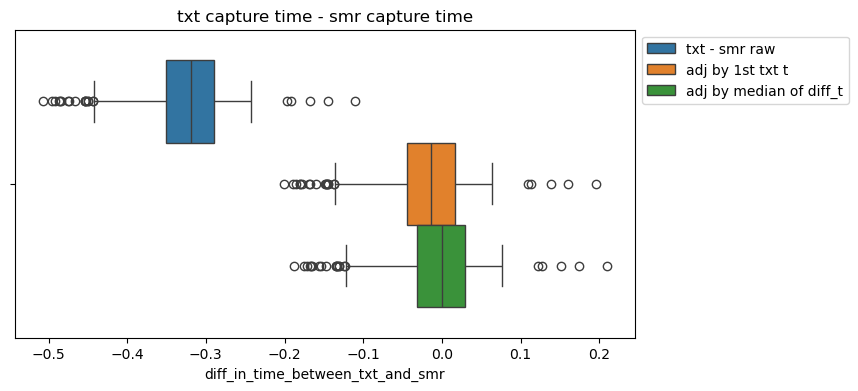

In [ ]:
t_inst.compare_txt_and_smr_with_boxplot()

                      name    slope  intercept  r_value  p_value  std_err  \
0            txt - smr raw -0.00002   -0.29709 -0.39525  0.00000  0.00000   
1         adj by 1st txt t -0.00002    0.00886 -0.39525  0.00000  0.00000   
2  adj by median of diff_t -0.00002    0.02224 -0.39525  0.00000  0.00000   

   slope x time  sample_size  
0      -0.06211          529  
1      -0.06211          529  
2      -0.06211          529  


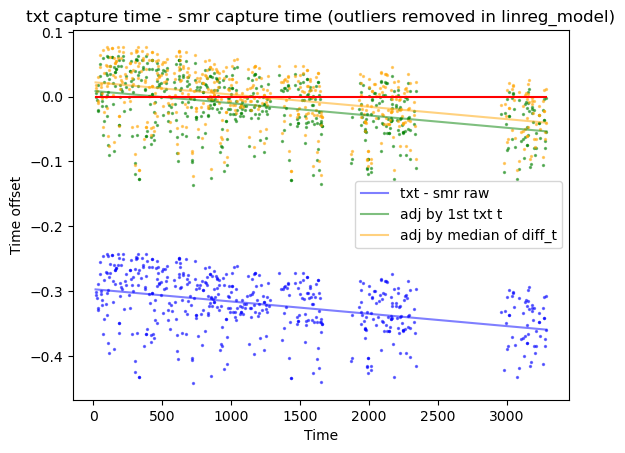

In [ ]:
t_inst.compare_txt_and_smr_with_scatterplot()

### txt vs neural

In [2]:
t_inst.compare_txt_and_neural_with_scatterplot()

NameError: name 't_inst' is not defined

### neural vs smr

               name    slope  intercept  r_value  p_value  std_err  \
0  adj by 1st txt t -0.00001    0.00065 -0.99962  0.00000  0.00000   
1    adj by label=1 -0.00001    0.00065 -0.99962  0.00000  0.00000   

   slope x time  sample_size  
0      -0.04350          551  
1      -0.04350          551  


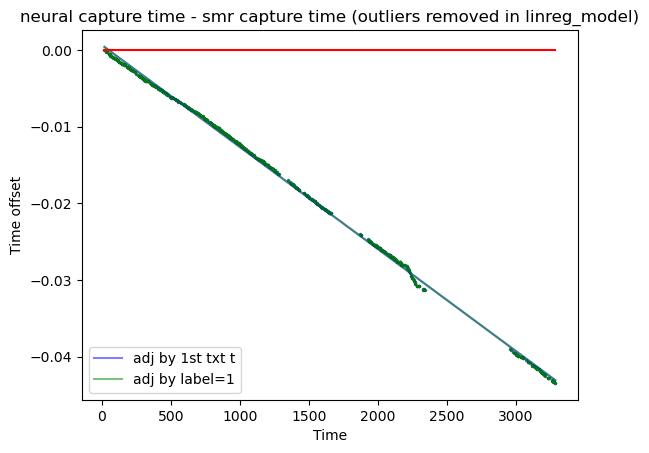

In [ ]:
t_inst.compare_neural_and_smr_with_scatterplot()

# Neural data calibration

## verify that the calibration is correct

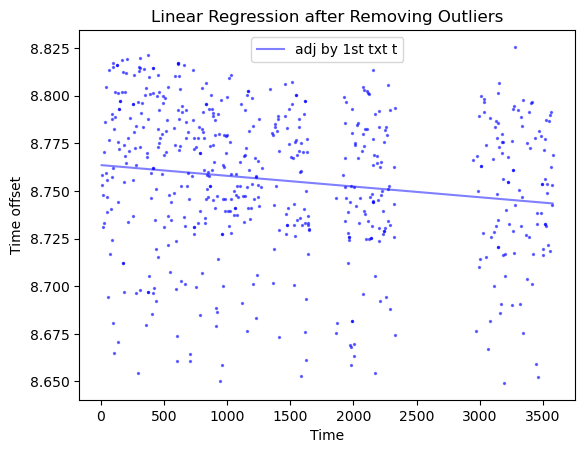

Saved txt_neural_t_linreg.csv to all_monkey_data/time_calibration/monkey_Schro/data_0410/txt_neural_t_linreg.csv
               name    slope  intercept  r_value  p_value  std_err  \
0  adj by 1st txt t -0.00001    8.76358 -0.15582  0.00018  0.00000   

   slope x time  sample_size  
0      -0.02008          572  


In [4]:
calibrated_neural_event_t = time_calib_utils.calibrate_neural_data_time(t_inst.ff_caught_times_df['neural_t_raw_ext'].values, t_inst.raw_data_folder_path, t_inst.ff_caught_T_sorted, show_plot=True)

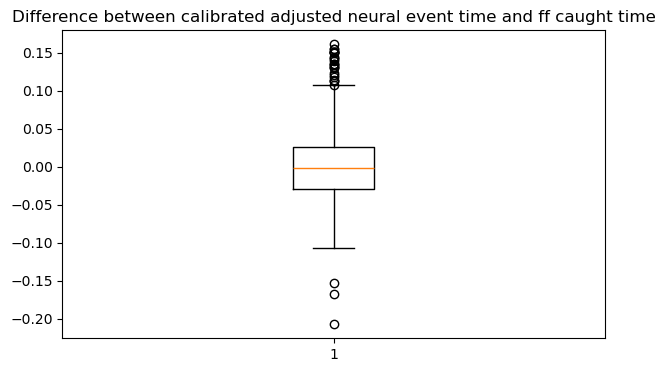

In [5]:
temp_array = calibrated_neural_event_t - t_inst.ff_caught_T_sorted[:len(calibrated_neural_event_t)]
# make a boxplot on temp_array
plt.figure(figsize=(7, 4))
plt.boxplot(temp_array)
plt.title('Difference between calibrated adjusted neural event time and ff caught time')
plt.show()

In [6]:
temp_df = pd.DataFrame({'diff': temp_array})
temp_df.describe()

,diff
count,551.00000
mean,0.00521
std,0.04896
min,-0.20710
25%,-0.02921
50%,-0.00104
75%,0.02571
max,0.16119


# Plot ff caught time

## Bruno

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


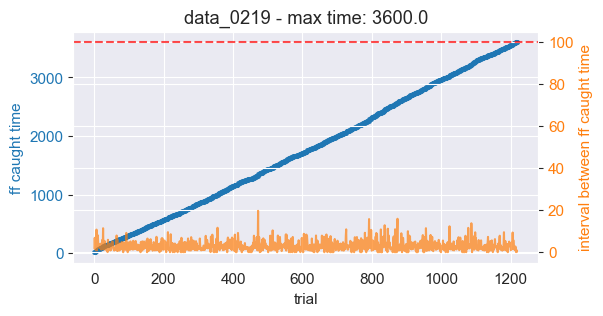

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


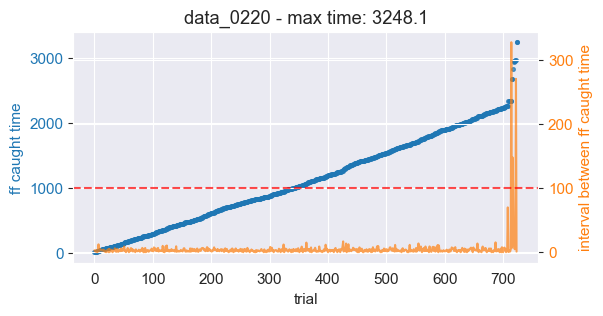

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0221
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


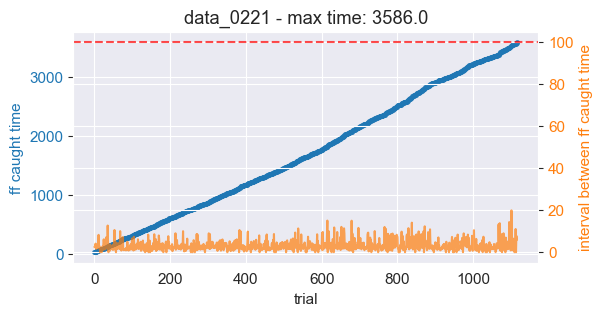

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0222
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


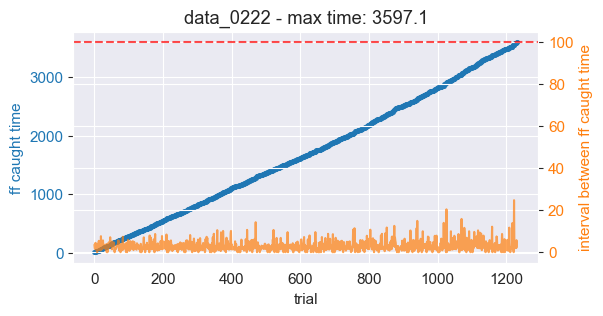

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0226
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


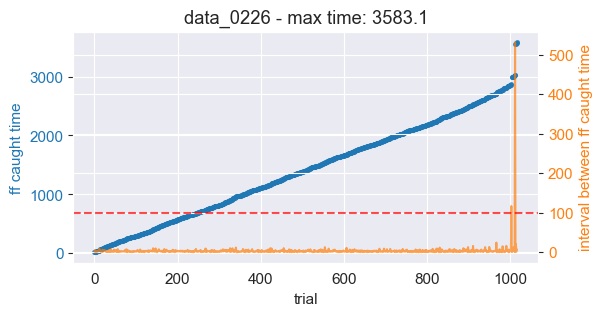

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0227
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


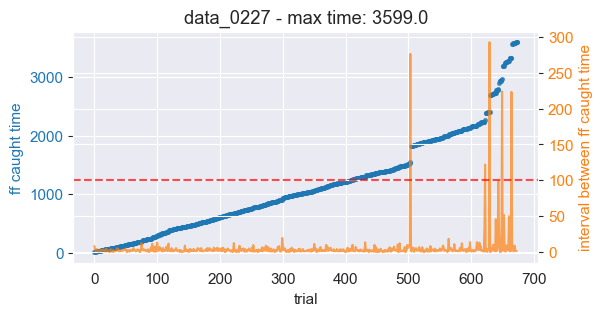

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0228
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


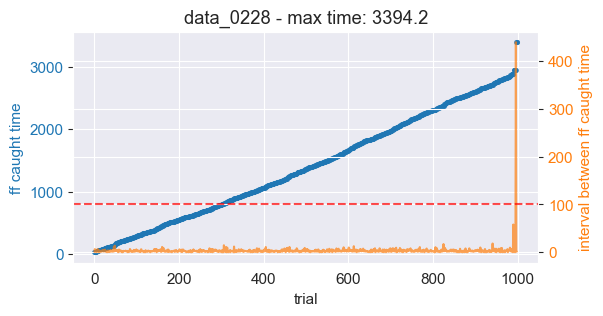

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0301
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


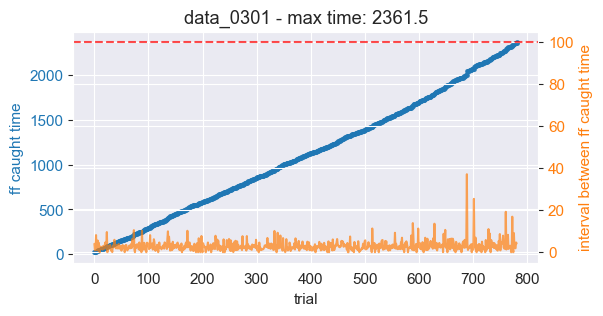

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0306
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


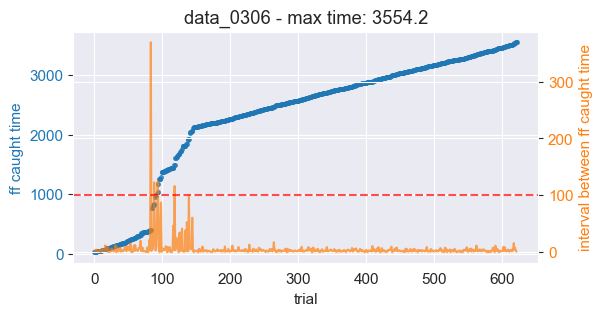

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0307
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


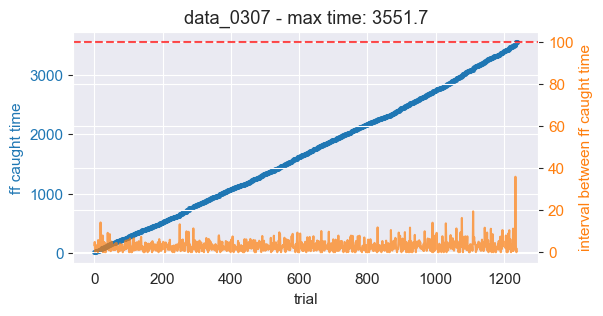

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0308
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


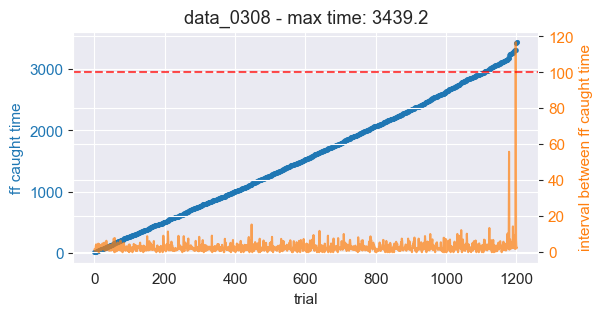

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0309
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


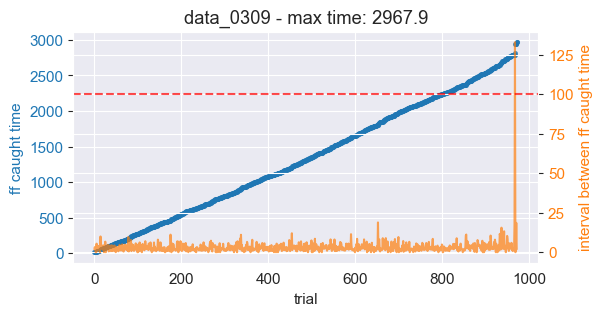

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


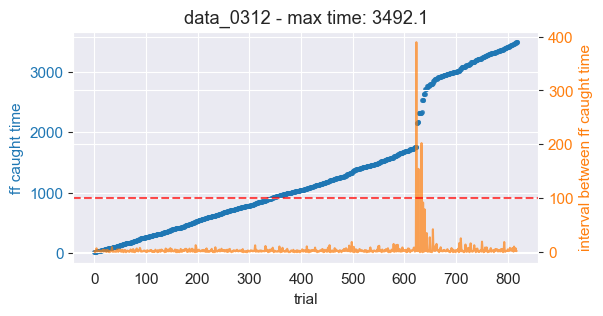

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


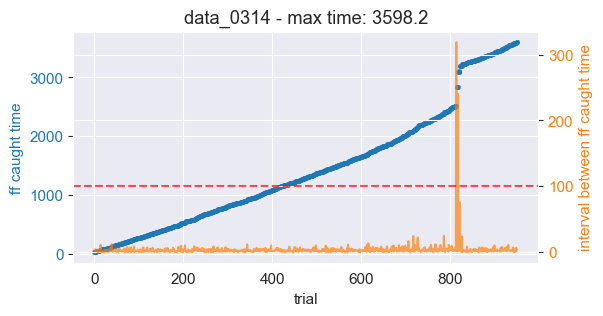

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0315
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


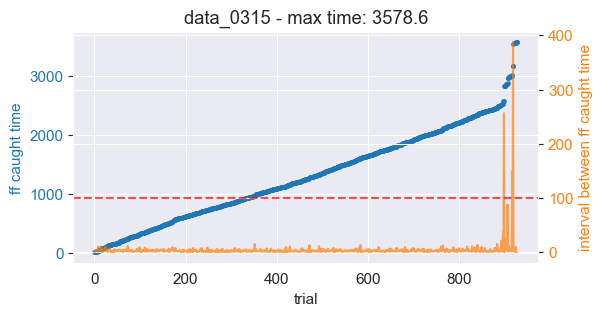

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


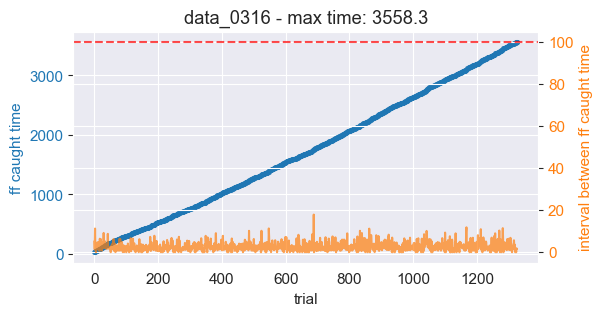

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0321
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


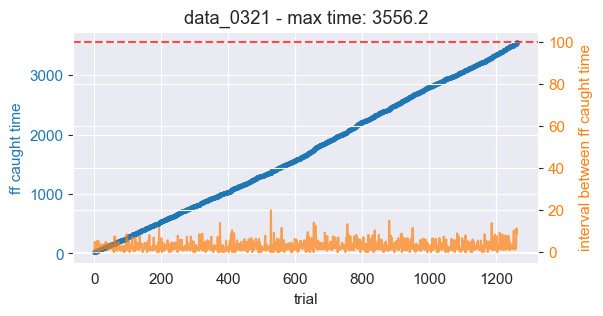

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


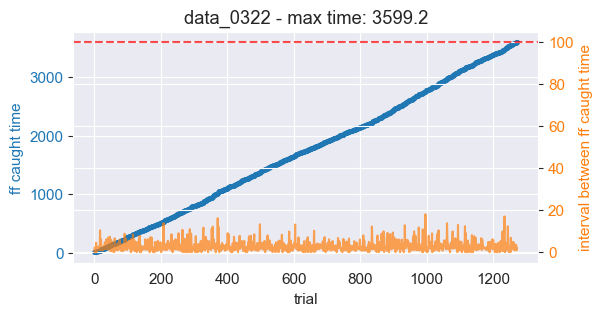

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0323
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


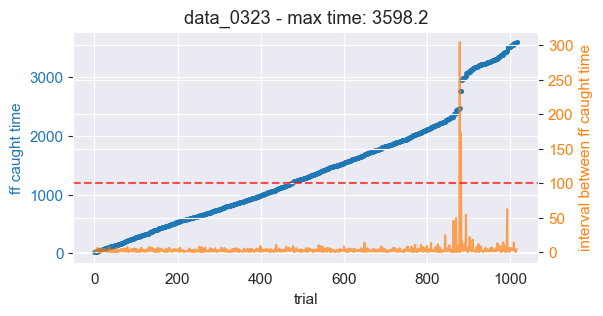

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


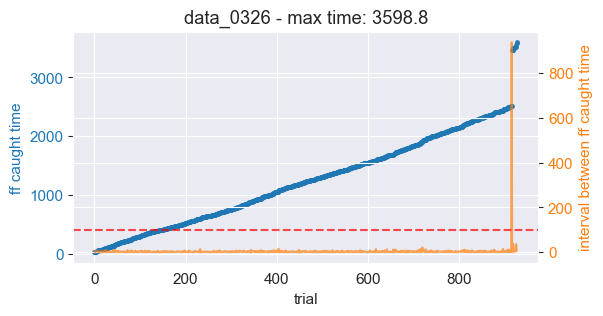

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


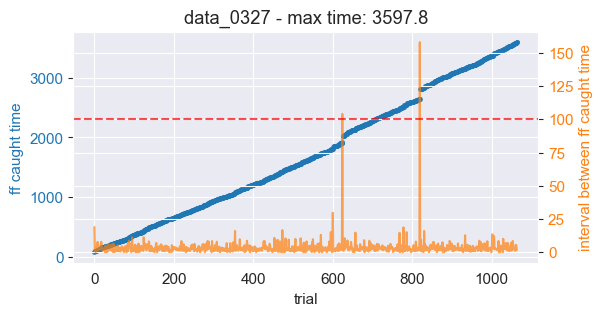

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


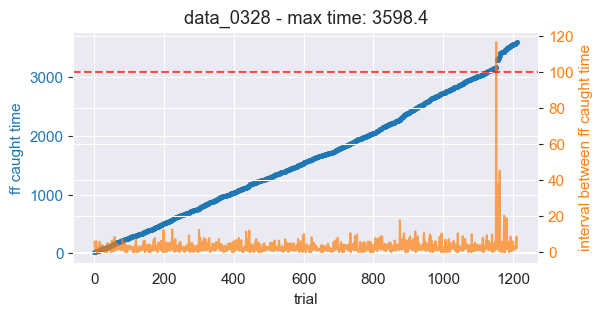

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0329
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


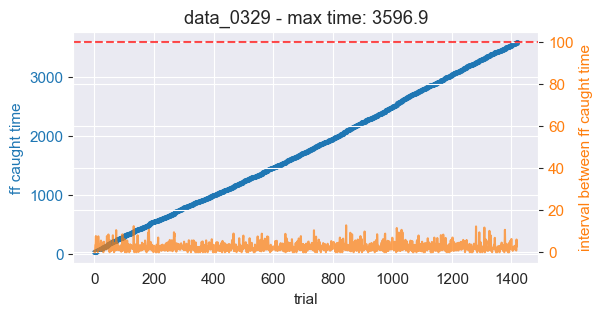

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


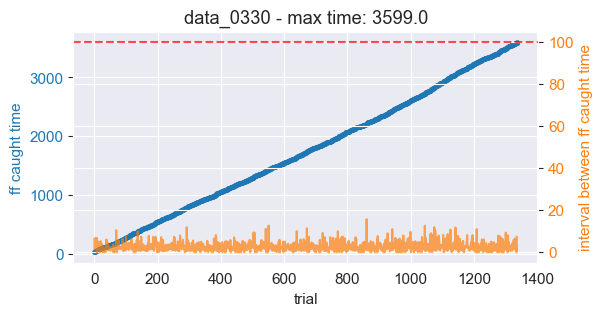

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0402
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


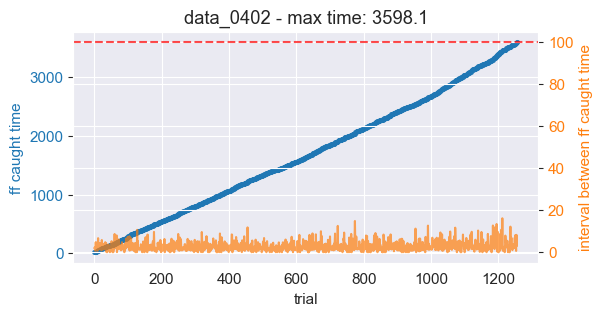

In [ ]:
additional_plots.plot_ff_caught_time(monkey_name='monkey_Bruno')

## Schro

all_monkey_data/raw_monkey_data/monkey_Schro/data_0316
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


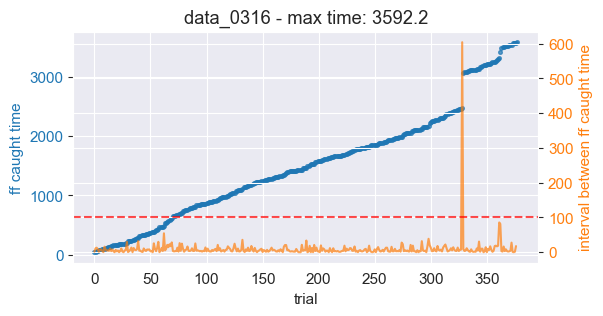

all_monkey_data/raw_monkey_data/monkey_Schro/data_0321
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


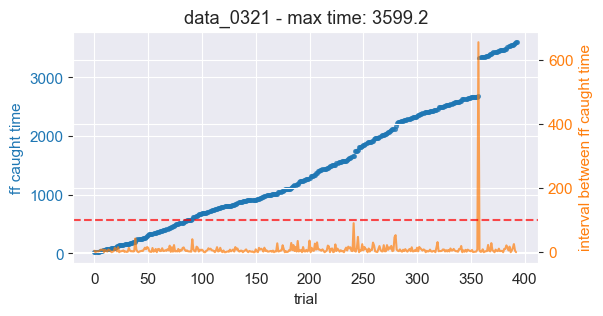

all_monkey_data/raw_monkey_data/monkey_Schro/data_0322
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


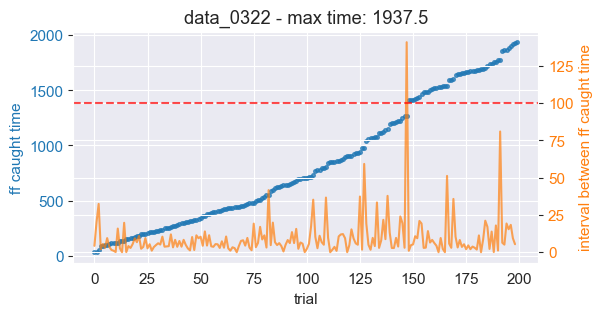

all_monkey_data/raw_monkey_data/monkey_Schro/data_0326
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


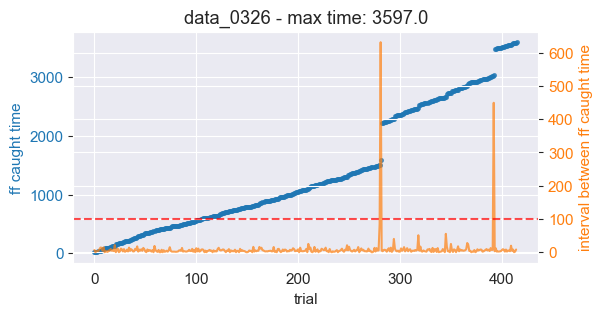

all_monkey_data/raw_monkey_data/monkey_Schro/data_0327
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


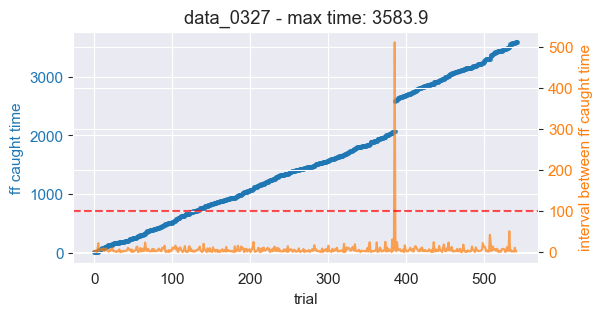

all_monkey_data/raw_monkey_data/monkey_Schro/data_0328
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


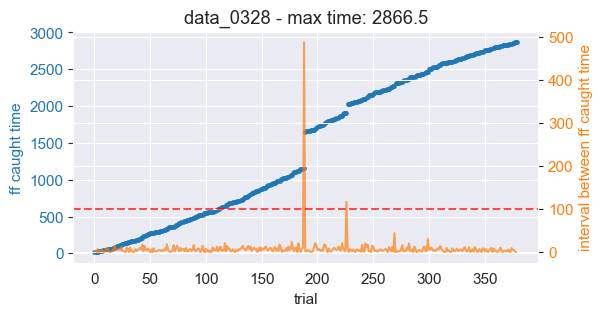

all_monkey_data/raw_monkey_data/monkey_Schro/data_0329
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


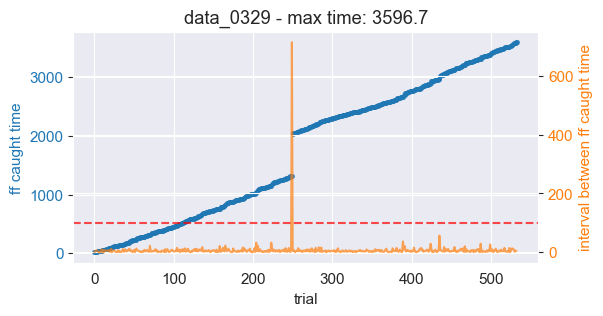

all_monkey_data/raw_monkey_data/monkey_Schro/data_0402
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


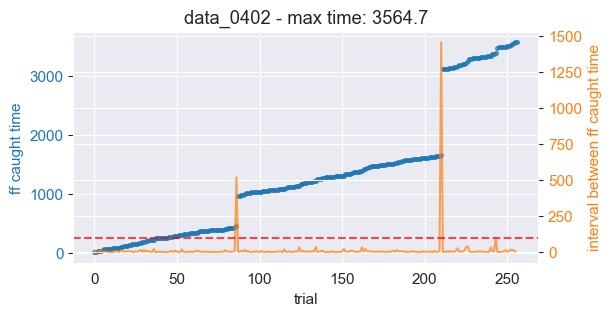

all_monkey_data/raw_monkey_data/monkey_Schro/data_0403
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


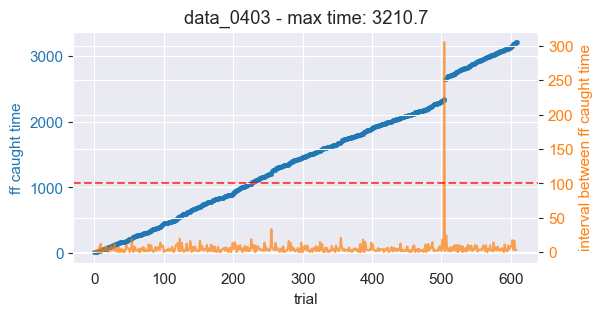

all_monkey_data/raw_monkey_data/monkey_Schro/data_0404
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


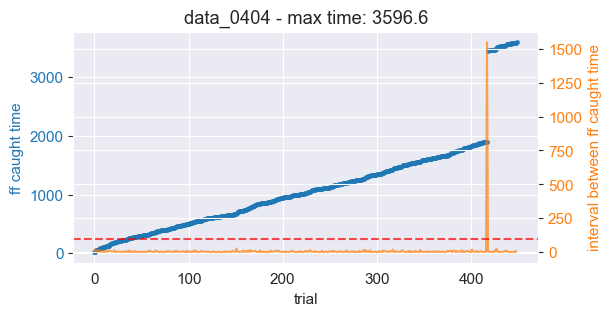

all_monkey_data/raw_monkey_data/monkey_Schro/data_0406
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


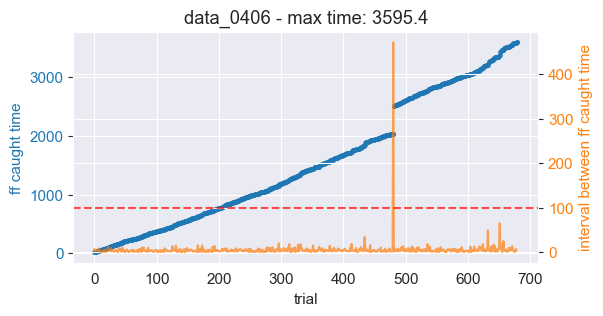

all_monkey_data/raw_monkey_data/monkey_Schro/data_0409
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


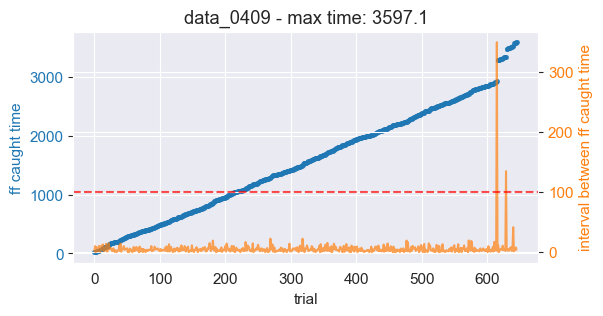

all_monkey_data/raw_monkey_data/monkey_Schro/data_0410
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


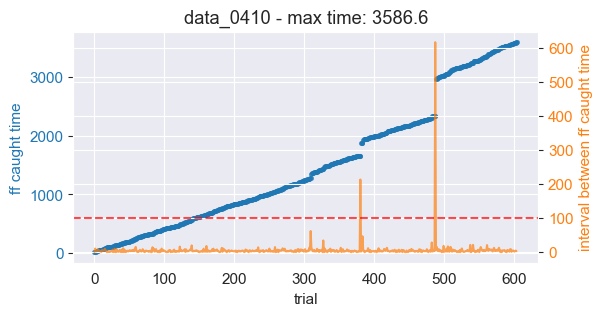

all_monkey_data/raw_monkey_data/monkey_Schro/data_0411
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


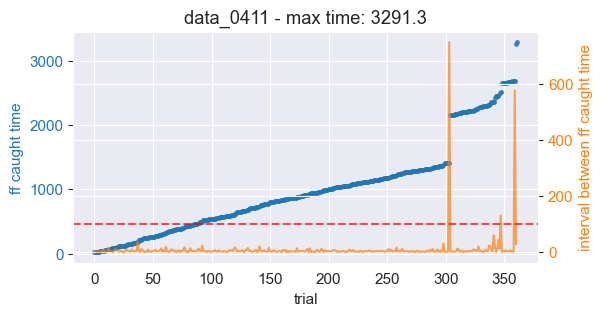

all_monkey_data/raw_monkey_data/monkey_Schro/data_0412
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


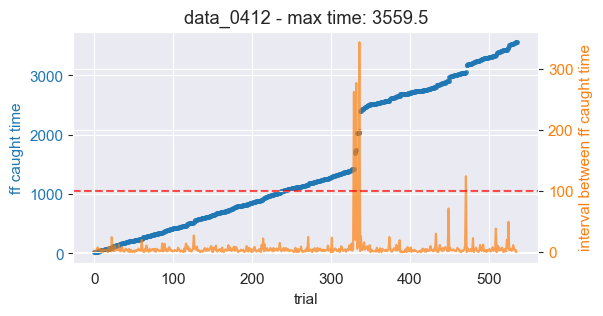

all_monkey_data/raw_monkey_data/monkey_Schro/data_0413
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


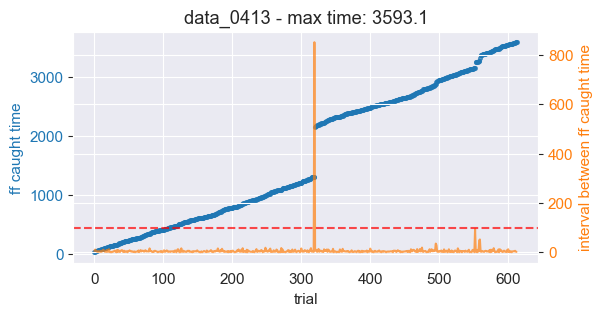

all_monkey_data/raw_monkey_data/monkey_Schro/data_0416
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


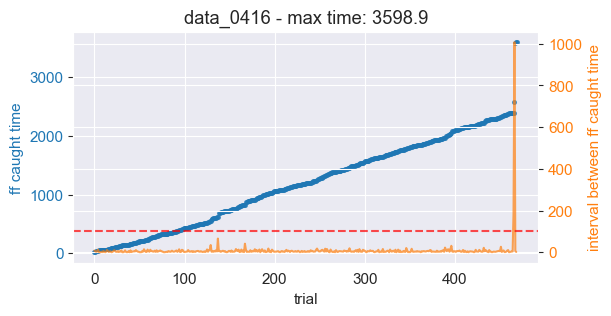

all_monkey_data/raw_monkey_data/monkey_Schro/data_0417
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


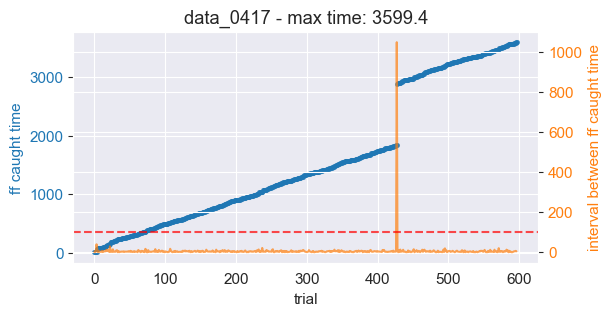

all_monkey_data/raw_monkey_data/monkey_Schro/data_0419
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


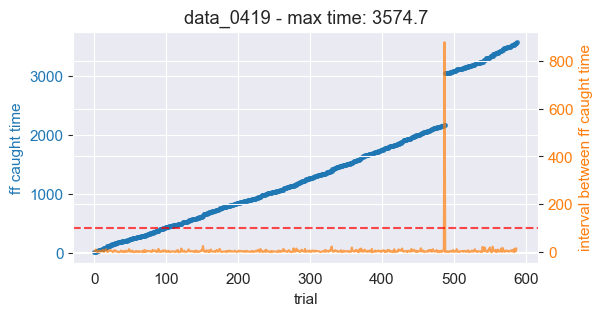

all_monkey_data/raw_monkey_data/monkey_Schro/data_0420
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


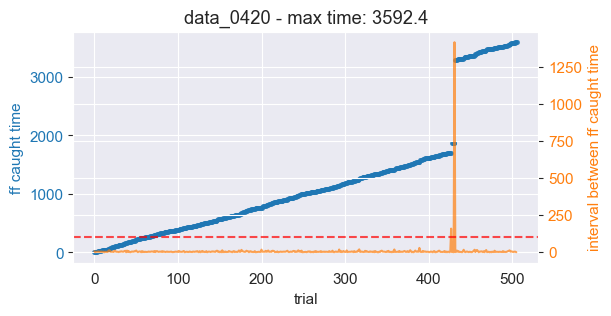

all_monkey_data/raw_monkey_data/monkey_Schro/data_0423
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


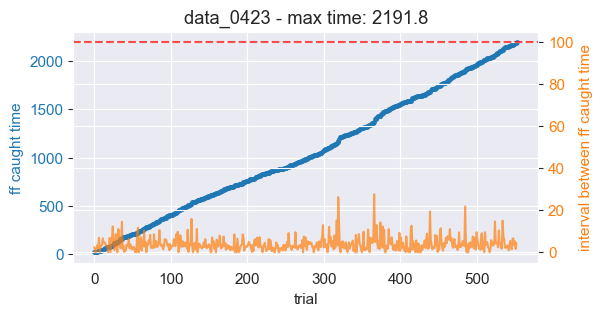

all_monkey_data/raw_monkey_data/monkey_Schro/data_0424
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new


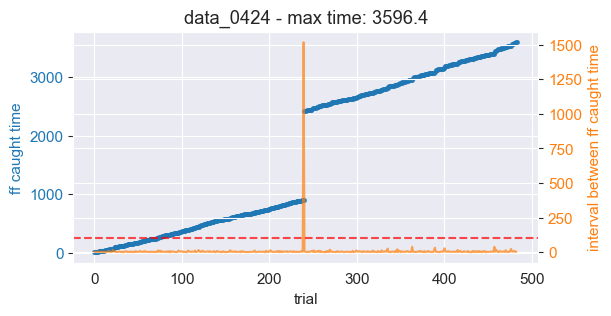

In [ ]:
additional_plots.plot_ff_caught_time(monkey_name='monkey_Schro')